# 📊 Analysis of Disney Plus platform

## Import Libraries

In [1]:
import pandas as pd

## Load dataset

In [2]:
df= pd.read_csv(r"E:\Project OTT\disney_plus_titles.csv")

## Inspect Data

In [3]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      976 non-null    object
 4   cast          1258 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


We need to check the data type and Null values

In [4]:
df.isnull().sum()

show_id           0
type              0
title             0
director        474
cast            192
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

## Remove null values

In [5]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['rating'] = df['rating'].fillna('NR')
df['country']=df['country'].fillna('Unknown')
df = df.dropna(subset=['date_added'])

In [6]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Check the Datatype

In [7]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['added_year'] = df['date_added'].dt.year

First change the datatype to datetime format and separate the year. Since [date_added] column have Month, days, and year . I split year as [added_year] separetely for better analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1447 entries, 0 to 1449
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       1447 non-null   object        
 1   type          1447 non-null   object        
 2   title         1447 non-null   object        
 3   director      1447 non-null   object        
 4   cast          1447 non-null   object        
 5   country       1447 non-null   object        
 6   date_added    1447 non-null   datetime64[ns]
 7   release_year  1447 non-null   int64         
 8   rating        1447 non-null   object        
 9   duration      1447 non-null   object        
 10  listed_in     1447 non-null   object        
 11  description   1447 non-null   object        
 12  added_year    1447 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(10)
memory usage: 152.6+ KB


#### Split the lited_in and cast column

In [9]:
df_cast = df[['title', 'cast']].dropna().copy()

# Split cast string by comma and explode to rows
df_cast['cast'] = df_cast['cast'].str.split(', ')
df_cast = df_cast.explode('cast')

# Remove 'unknown' or any empty values
df_cast['cast'] = df_cast['cast'].str.strip()
df_cast = df_cast[df_cast['cast'].str.lower() != 'unknown']
df_cast = df_cast[df_cast['cast'] != '']

# remove duplicates
df_cast.drop_duplicates(inplace=True)

df_genres = df[['title', 'listed_in']].dropna().copy()

# Split genre string and explode
df_genres['genre'] = df_genres['listed_in'].str.split(', ')
df_genres = df_genres.explode('genre')

# Clean genre column
df_genres['genre'] = df_genres['genre'].str.strip()
df_genres = df_genres[df_genres['genre'].str.lower() != 'unknown']
df_genres = df_genres[df_genres['genre'] != '']

# drop duplicates
df_genres.drop_duplicates(inplace=True)

df = df.dropna(subset=['listed_in']).copy()
df['genre'] = df['listed_in'].str.split(', ')
df = df.explode('genre')
df['genre'] = df['genre'].str.strip()
df = df.dropna(subset=['cast']).copy()
df['actor'] = df['cast'].str.split(', ')
df = df.explode('actor')
df['actor'] = df['actor'].str.strip()

In [10]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,genre,actor
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",Unknown,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,2021,Animation,Chris Diamantopoulos
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",Unknown,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,2021,Animation,Tony Anselmo
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",Unknown,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,2021,Animation,Tress MacNeille
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",Unknown,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,2021,Animation,Bill Farmer
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",Unknown,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,2021,Animation,Russi Taylor


## Download Data for comparative analysis

In [11]:
df.to_csv('Disney_Plus.csv', index=False)

## Exploratory Analysis for Disney

#### Count of Movies vs TV Shows

In [12]:
df['type'].value_counts()

type
Movie      13109
TV Show     3636
Name: count, dtype: int64

#### #% of Movies vs TV Shows

In [13]:
df['type'].value_counts(normalize=True) * 100

type
Movie      78.286056
TV Show    21.713944
Name: proportion, dtype: float64

#### Most Released Type in the Latest Year

In [14]:
latest_year = df['release_year'].max()
df[df['release_year'] == latest_year]['type'].value_counts()

type
Movie      508
TV Show    397
Name: count, dtype: int64

#### Count of Each Rating

In [15]:
df['rating'].value_counts()

rating
G           3723
PG          3692
TV-G        3489
TV-PG       2078
TV-Y7       1493
PG-13       1074
TV-Y         572
TV-14        434
TV-Y7-FV     167
NR            23
Name: count, dtype: int64

#### Rating Distribution by Content Type

In [16]:
df.groupby('type')['rating'].value_counts()

type     rating  
Movie    G           3723
         PG          3689
         TV-G        2593
         TV-PG       1349
         PG-13       1074
         TV-Y7        339
         TV-14        173
         TV-Y7-FV     103
         TV-Y          57
         NR             9
TV Show  TV-Y7       1154
         TV-G         896
         TV-PG        729
         TV-Y         515
         TV-14        261
         TV-Y7-FV      64
         NR            14
         PG             3
Name: count, dtype: int64

#### Average movie duration

In [17]:
# Step-1: Separate Movies and TV Shows 
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

#Step-2: Extract duration in minutes for movie
movies = df[df['type'] == 'Movie'].copy()
movies['duration_minutes'] = movies['duration'].str.extract('(\d+)')
movies['duration_minutes'] = movies['duration_minutes'].astype(float)

#Step-3: Print the average movie duration
print("Average Movie duration is:", int(movies['duration_minutes'].mean()))

Average Movie duration is: 83


#### Top 5 Most Common Genres

In [18]:
df['genre'].value_counts().head(5)

genre
Comedy              2584
Family              2545
Action-Adventure    2359
Animation           2258
Coming of Age       1166
Name: count, dtype: int64

#### Genre per Content Type

In [19]:
df.groupby('type')['genre'].value_counts().head(10)

type   genre           
Movie  Family              2298
       Comedy              2059
       Action-Adventure    1813
       Animation           1589
       Coming of Age        907
       Fantasy              859
       Drama                693
       Science Fiction      437
       Animals & Nature     349
       Documentary          324
Name: count, dtype: int64

#### Most common actors in the platform

In [20]:
#Step-1: split and flatten the cast column
from collections import Counter
all_cast = df['cast'].dropna().str.split(', ')
flat_cast = [actor for sublist in all_cast for actor in sublist]

#Step-2: Count the actors
filtered_cast = [actor for actor in flat_cast if actor.lower() != 'unknown']
cast_count = Counter(filtered_cast)
cast_count.most_common(5)

[('Jim Cummings', 530),
 ('Jeff Bennett', 258),
 ('Bill Farmer', 255),
 ('Corey Burton', 243),
 ('Tress MacNeille', 235)]

#### Top cast by type

In [21]:
#top cast by type
from collections import Counter

# Step 1: Get cast data for Movies, drop NaNs, split
movies_cast = df[df['type'] == 'Movie']['cast'].dropna().str.split(', ')

# Step 2: Flatten and filter out 'Unknown'
movies_flat_cast = [
    actor for sublist in movies_cast for actor in sublist if actor.lower() != 'unknown'
]

# Step 3: Count and get top 5
top_actors = Counter(movies_flat_cast).most_common(5)
print(top_actors)

[('Jim Cummings', 348), ('Tim Allen', 231), ('Wallace Shawn', 222), ('Larry the Cable Guy ', 216), ('Tom Hanks', 198)]


## For Dashboard

#### Total Titles on Netflix

In [22]:
total_titles = len(df)
print("Total Titles on Disney:", total_titles)

Total Titles on Disney: 16745


#### Average Movie Duration

In [23]:
# Step-1: Separate Movies and TV Shows 
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

#Step-2: Extract duration in minutes for movie
movies = df[df['type'] == 'Movie'].copy()
movies['duration_minutes'] = movies['duration'].str.extract('(\d+)')
movies['duration_minutes'] = movies['duration_minutes'].astype(float)

#Step-3: Print the average movie duration
print("Average Movie duration is:", int(movies['duration_minutes'].mean()))

Average Movie duration is: 83


#### Content Type Distribution (Movies vs TV Shows)

In [24]:
type_distribution = df['type'].value_counts()
print("Content Type Distribution:")
print(type_distribution)

Content Type Distribution:
type
Movie      13109
TV Show     3636
Name: count, dtype: int64


#### Most Common Genre

In [25]:
df['genre'].value_counts().head(5)

genre
Comedy              2584
Family              2545
Action-Adventure    2359
Animation           2258
Coming of Age       1166
Name: count, dtype: int64

#### Top release year

In [26]:
top_years =df['release_year'].value_counts().head(5)
print("Top 5 Release Years on Netflix:")
print(top_years)

Top 5 Release Years on Netflix:
release_year
2021    905
2019    869
2020    840
2011    738
2014    663
Name: count, dtype: int64


#### 1) Content release by year

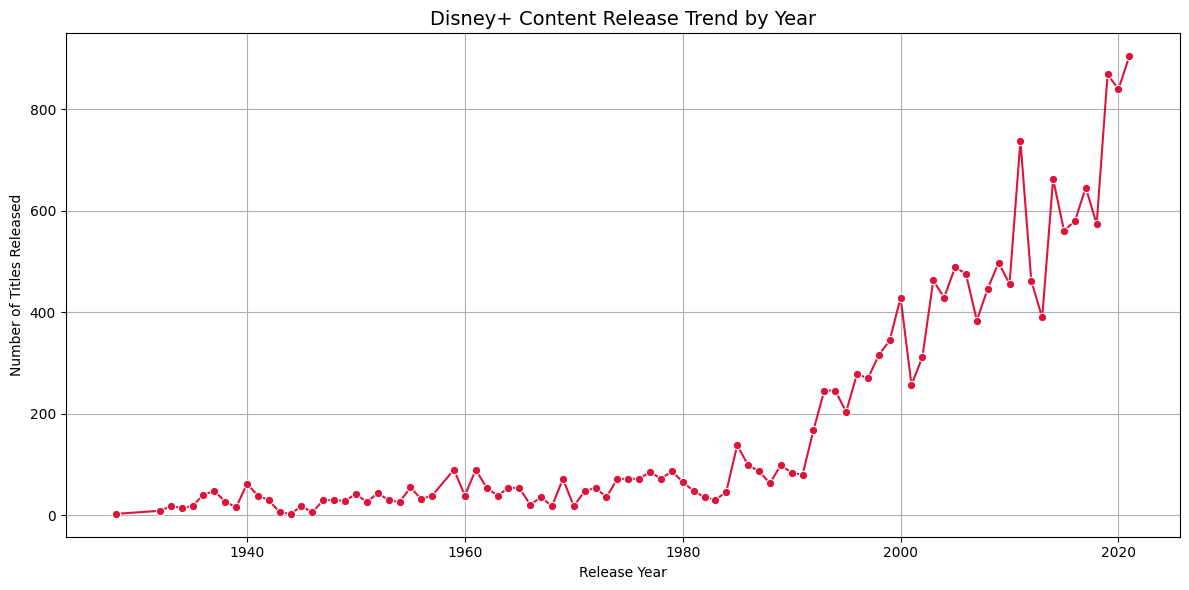

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by release year and count titles
release_trend = df['release_year'].value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=release_trend.index, y=release_trend.values, marker='o', color='crimson')
plt.title('Disney+ Content Release Trend by Year', fontsize=14)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles Released')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2) Rating distribution

C:\Users\Divya Ramaingam\AppData\Local\Temp\ipykernel_9472\633955464.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="magma")


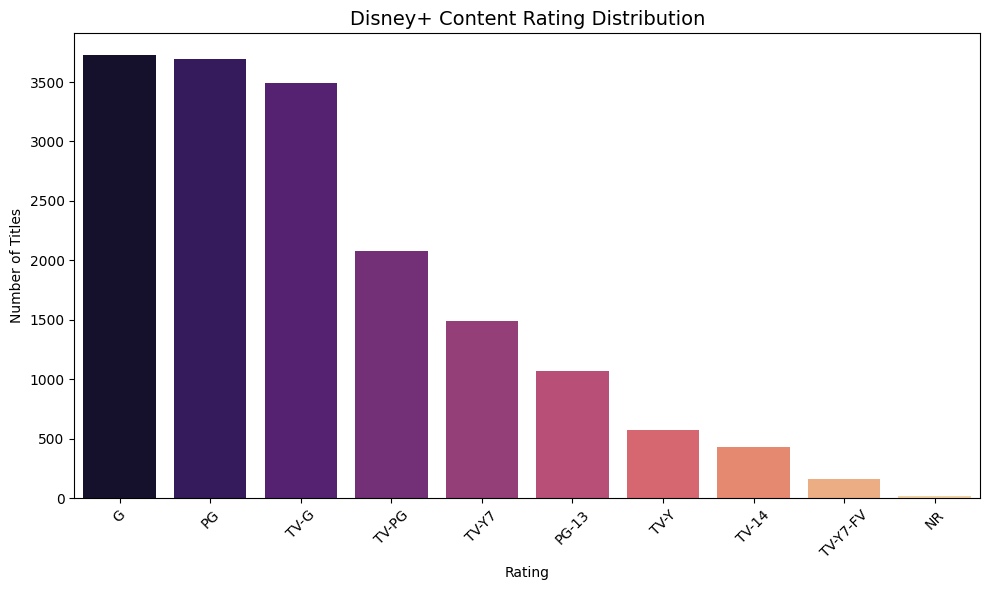

In [28]:
rating_counts = df['rating'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="magma")
plt.title('Disney+ Content Rating Distribution', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 3)Top Occuring Movie

In [29]:
top_movie = df['title'].value_counts().head(5)

# Display the result
print("Top Occurring Movie on Disney+:")
print(top_movie)

Top Occurring Movie on Disney+:
title
Doc McStuffins: The Doc Is In     21
Lady and the Tramp                18
Kronk's New Groove                18
Johnny Tsunami                    18
Johnny Kapahala: Back on Board    18
Name: count, dtype: int64


#### 4)Top cast members

In [37]:
from collections import Counter

# Step 1: Drop null and clean
df_actor = df[['title', 'actor']].dropna().copy()
df_actor = df_actor[~df_actor['actor'].str.contains('Unknown', case=False)]

# Step 2: Split and explode actors
df_actor['actor'] = df_actor['actor'].str.split(', ')
df_actor = df_actor.explode('actor')
df_actor['actor'] = df_actor['actor'].str.strip()

# Step 3: Drop duplicate title-actor pairs
df_actor = df_actor.drop_duplicates(subset=['title', 'actor'])

# Step 4: Count appearances
top_5_unique_actors = df_actor['actor'].value_counts().head(5)

# Display result
print("🎬 Top 5 Actors by Unique Title Appearances:")
for actor, count in top_5_unique_actors.items():
    print(f"{actor}: {count} unique titles")


🎬 Top 5 Actors by Unique Title Appearances:
Jim Cummings: 33 unique titles
Walt Disney: 20 unique titles
Larry the Cable Guy: 19 unique titles
Bill Farmer: 18 unique titles
Tress MacNeille: 16 unique titles


In [38]:
df_actor = df.explode('actor')
df_actor['actor'] = df_actor['actor'].str.strip()

# Filter for Jim Cummings and drop duplicates based on title
jim_cummings_titles = df_actor[df_actor['actor'] == 'Jim Cummings']['title'].drop_duplicates()

print("Unique titles with Jim Cummings:", len(jim_cummings_titles))

Unique titles with Jim Cummings: 33


#### 5)Top Directors

In [31]:
from collections import Counter

# Drop nulls and exclude 'Unknown'
clean_directors = df['director'].dropna()
clean_directors = clean_directors[~clean_directors.str.contains('Unknown', case=False)]

# Split and flatten
directors_split = clean_directors.str.split(', ')
flat_directors = [director for sublist in directors_split for director in sublist]

# Count top 5
top_5_directors = Counter(flat_directors).most_common(5)

# Display result
print("Top 5 Directors in Disney+ Dataset:")
for director, count in top_5_directors:
    print(f"{director}: {count} titles")

Top 5 Directors in Disney+ Dataset:
Paul Hoen: 252 titles
Robert Stevenson: 219 titles
John Lasseter: 183 titles
Vincent McEveety: 168 titles
Clyde Geronimi: 165 titles


#### 6)Genre Popularity

In [33]:
from collections import Counter

# Drop missing values and split genres
genres = df['genre'].dropna().str.split(', ')
flat_genres = [genre.strip() for sublist in genres for genre in sublist]

# Count and get top 10 genres
genre_count = Counter(flat_genres).most_common(10)

# Display result
print("Top 10 Genres:")
for genre, count in genre_count:
    print(f"{genre}: {count} titles")


Top 10 Genres:
Comedy: 2584 titles
Family: 2545 titles
Action-Adventure: 2359 titles
Animation: 2258 titles
Coming of Age: 1166 titles
Fantasy: 1030 titles
Drama: 764 titles
Kids: 587 titles
Science Fiction: 488 titles
Animals & Nature: 450 titles


In [34]:
df.to_csv("cleaned_disney+_data.csv", index=False)